In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score,accuracy_score,classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
%matplotlib inline

# DATASET II

In [2]:
data_3l = pd.read_csv('column_3C_weka.csv')
print(data_3l.shape)
data_3l.head()

(310, 7)


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [3]:
data_3l.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [4]:
data_3l.isnull().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [5]:
data_3l['class'].value_counts()

Spondylolisthesis    150
Normal               100
Hernia                60
Name: class, dtype: int64

# PLOTTING

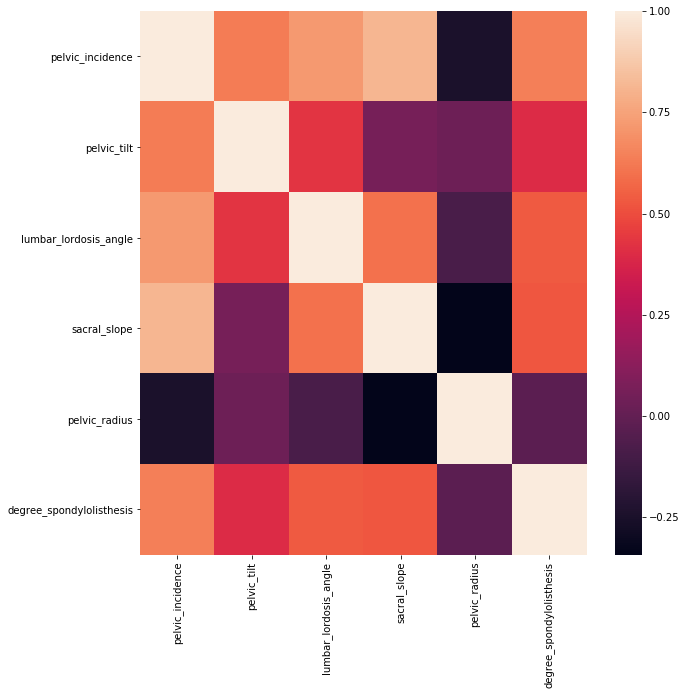

In [36]:
corre = data_3l.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corre)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023AA05A3240>,
      dtype=object)

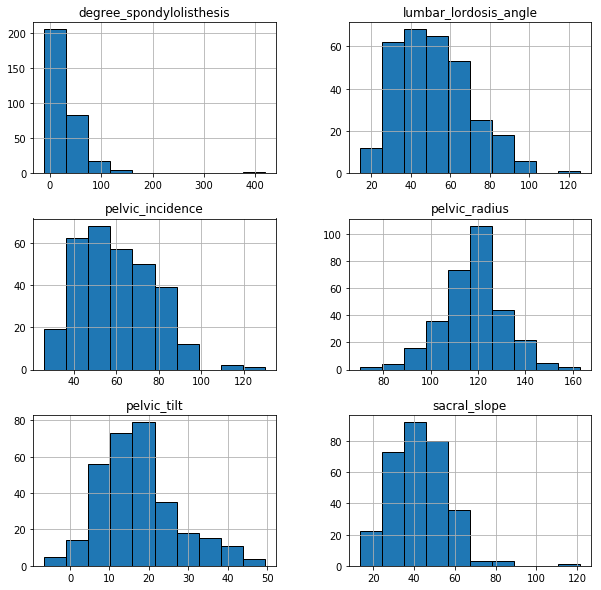

In [39]:
data_3l.hist(figsize = (10,10), edgecolor = 'Black')

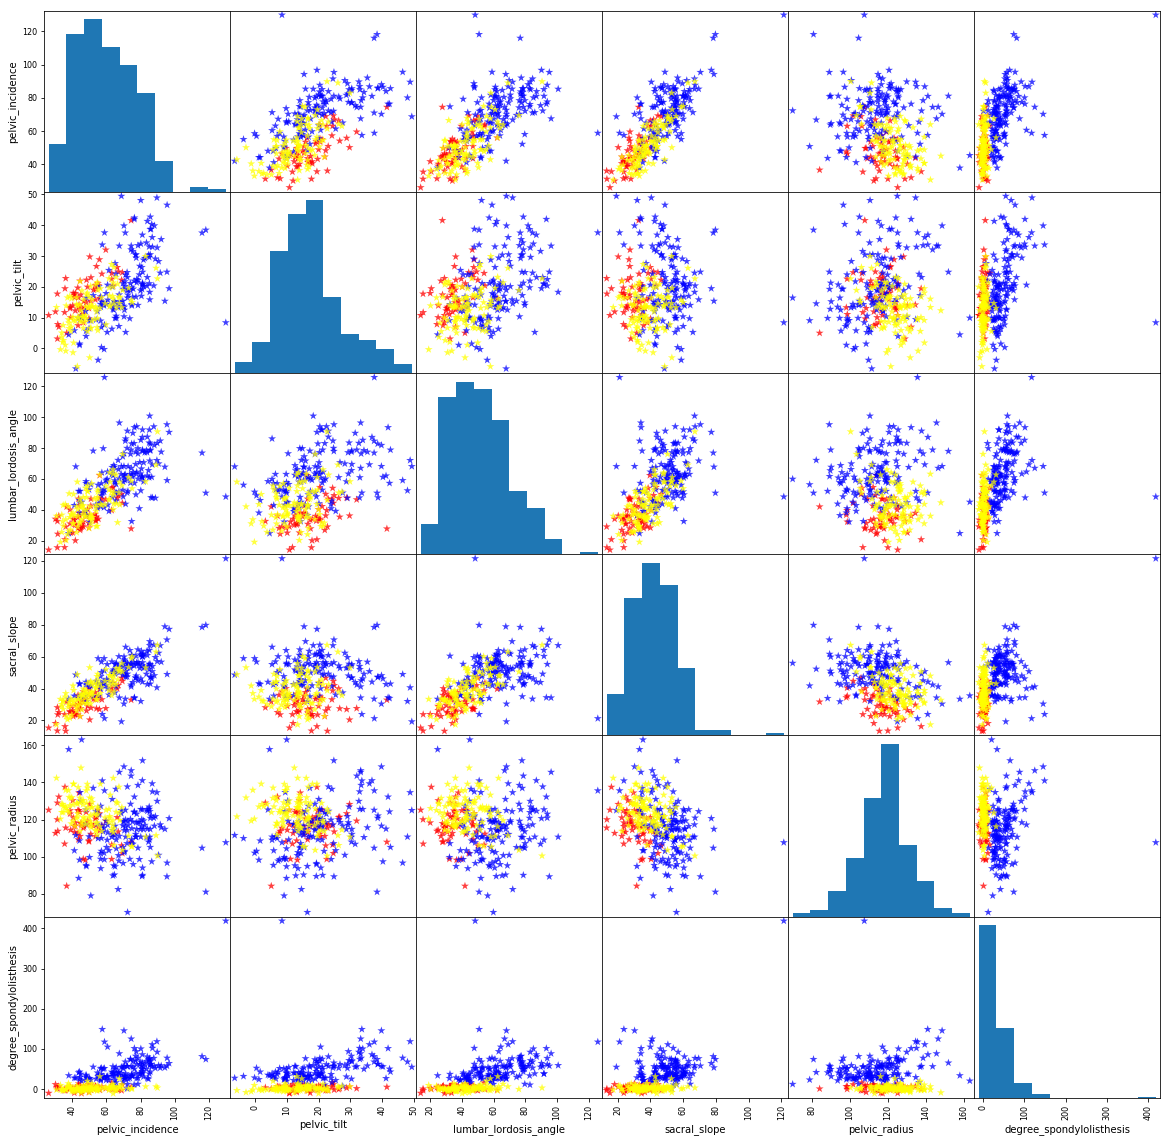

In [57]:
colors = ['Red' if i=='Hernia' else 'Blue' if i=='Spondylolisthesis' else 'Yellow' for  i in data_3l['class']]
pd.plotting.scatter_matrix(data_3l.iloc[:,:-1], color = colors , figsize=(20,20), marker = "*", alpha = 0.75, s = 70)
plt.show()

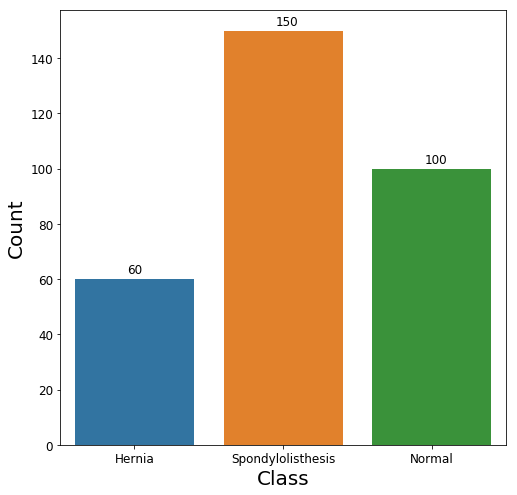

In [63]:
plt.figure(figsize = (8,8))
ax = sns.countplot(data_3l['class'])
plt.xlabel('Class', fontdict={'fontsize':20})
plt.ylabel('Count',fontdict={'fontsize':20})
plt.tick_params(labelsize = 12)
for i in ax.patches:
    plt.text(i.get_x() + 0.35, i.get_height() + 2, str(i.get_height()), fontdict={'fontsize':12})

In [7]:
means = data_3l.groupby('class').agg(np.mean)
means

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
class,,,,,,
Hernia,47.638407,17.398795,35.463524,30.239612,116.474968,2.480251
Normal,51.685244,12.821414,43.542605,38.863830,123.890834,2.186572
Spondylolisthesis,71.514224,20.748038,64.110108,50.766186,114.518810,51.896687


In [8]:
means.columns

Index(['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis'],
      dtype='object')

Text(0.5, 1.0, 'UNDERSTANDING THE CAUSES')

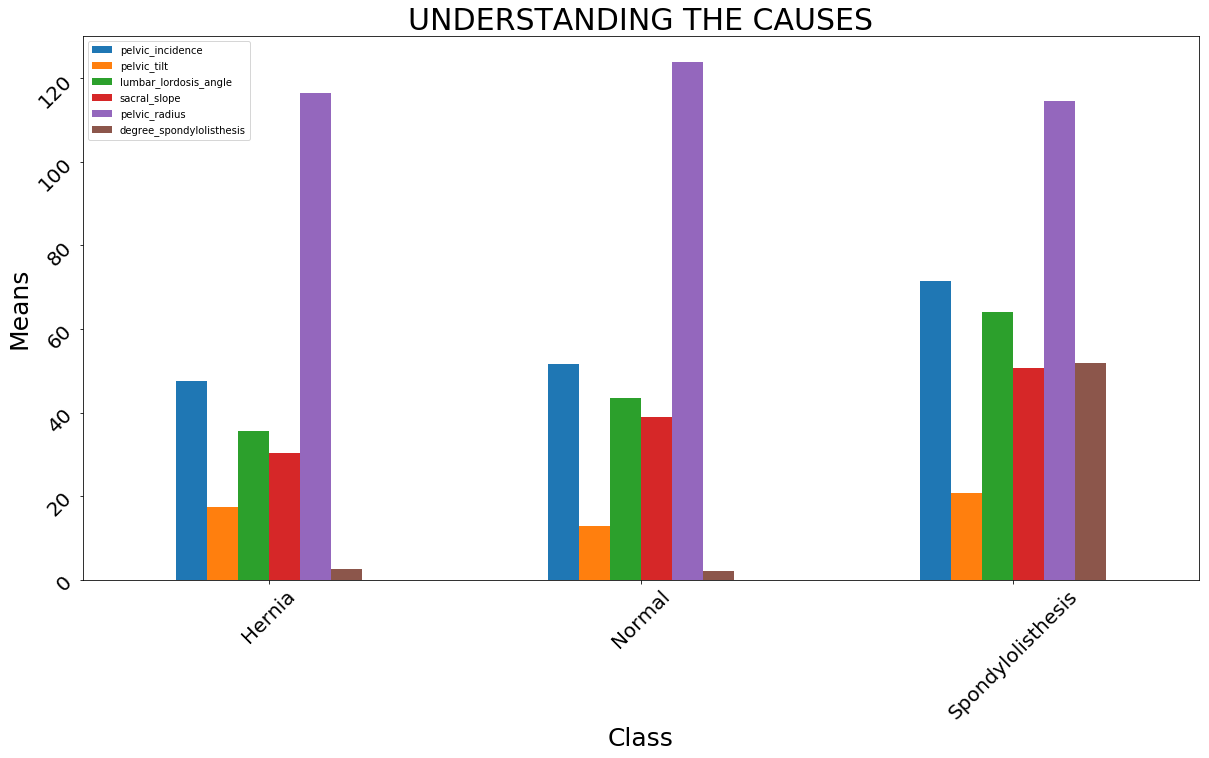

In [9]:
means.plot(kind = 'bar', figsize = (20,10), fontsize = 20)
plt.xlabel('Class',fontdict={'fontsize': 25})
plt.ylabel('Means',fontdict={'fontsize': 25})
plt.tick_params(labelrotation = 45)
plt.title('UNDERSTANDING THE CAUSES', fontdict={"fontsize":30})

# PREPROCESSING

In [10]:
X = data_3l.iloc[:,:6].values
y = data_3l['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

# MODEL IMPLEMENTATION

In [11]:
lr = LogisticRegression(C = 6, solver='liblinear', multi_class='auto', max_iter= 400)
lr.fit(X_train,y_train)
predictions = lr.predict(X_test)
print('Accuracy = {0}'.format(lr.score(X_test,y_test)))
print(classification_report(y_test, predictions))

Accuracy = 0.9032258064516129
                   precision    recall  f1-score   support

           Hernia       0.80      1.00      0.89         4
           Normal       0.91      0.91      0.91        11
Spondylolisthesis       0.93      0.88      0.90        16

        micro avg       0.90      0.90      0.90        31
        macro avg       0.88      0.93      0.90        31
     weighted avg       0.91      0.90      0.90        31



In [29]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
predict = knn.predict(X_test)
print('Accuracy = {0}'.format(knn.score(X_test,y_test)))
print(classification_report(y_test, predict))

Accuracy = 0.8709677419354839
                   precision    recall  f1-score   support

           Hernia       0.67      1.00      0.80         4
           Normal       0.90      0.82      0.86        11
Spondylolisthesis       0.93      0.88      0.90        16

        micro avg       0.87      0.87      0.87        31
        macro avg       0.83      0.90      0.85        31
     weighted avg       0.89      0.87      0.87        31



In [22]:
list_scores = []
list_no = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    list_scores.append(knn.score(X_test, y_test))
    list_no.append(i)

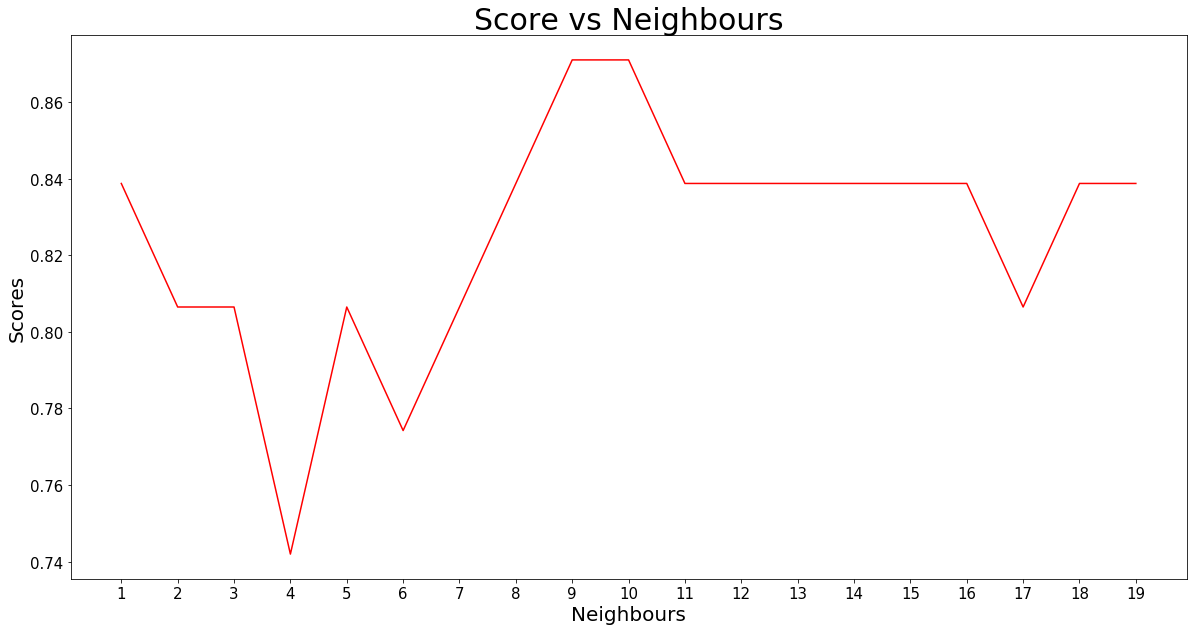

In [34]:
plt.figure(figsize=(20,10))
plt.xticks(range(1,20))
plt.xlabel('Neighbours', fontdict={'fontsize':20})
plt.ylabel('Scores', fontdict={'fontsize':20})
plt.title('Score vs Neighbours', fontdict={'fontsize':30})
plt.tick_params(labelsize = 15)
plt.plot(list_no, list_scores, color = 'RED')